In [112]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("HR_comma_sep.csv", header = 0)

In [64]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [65]:
df.salary.nunique()

3

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
df.duplicated().sum()

3008

In [68]:
df.drop_duplicates(keep='first', inplace = True)

In [69]:
df.shape

(11991, 10)

In [70]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [71]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [72]:
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left']]

In [73]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1


In [74]:
#from sklearn.preprocessing import OrdinalEncoder

#oe = OrdinalEncoder(categories=[['low', 'medium', 'high']])
#df['salary'] = oe.fit_transform(df[['salary']])

In [75]:
#df.salary.unique()

In [76]:
df['salary'] = df['salary'].map({'low' : 0, 'medium' : 1, 'high' : 2})

In [77]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1


In [79]:
dum = pd.get_dummies(df.Department, drop_first = True)
new_df  = pd.concat([df, dum], axis=1)

In [95]:
new_df = new_df.drop('Department', axis = 1)

### Split the dataset respect to dependent and independent (X&y)

In [96]:
X = new_df.drop('left', axis = 1)
y = new_df['left']

In [97]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,1,2,0,0,0,0,1,0,0,0,0


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [114]:
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
ypred_test = model.predict(X_test)
ypred_train = model.predict(X_train)

In [113]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, ypred_test))
print(accuracy_score(y_train, ypred_train))

from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv = 5).mean()

0.8365985827428095
0.8300667222685572


0.8173610007784033

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
cm

array([[1936,   69],
       [ 323,   71]], dtype=int64)

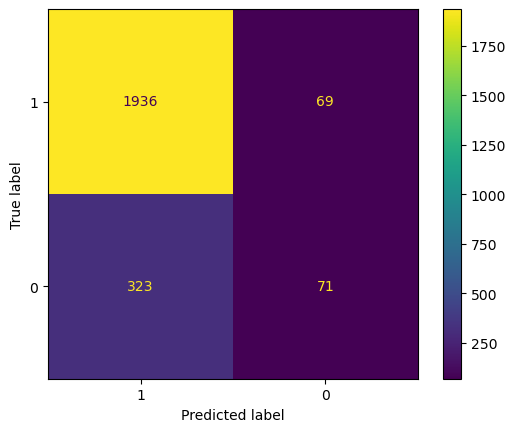

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=new_df['left'].unique()).plot()
plt.show()

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2005
           1       0.51      0.18      0.27       394

    accuracy                           0.84      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.84      0.80      2399



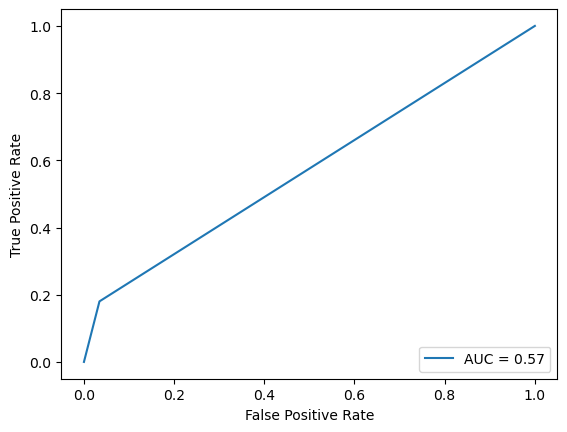

In [120]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresould = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr= fpr, tpr = tpr, roc_auc= roc_auc).plot()
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_test)

0.5728945402989988